In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
import wandb
import nltk
from nltk.stem.porter import *
from torch.nn import *
from torch.optim import *
import numpy as np
import pandas as pd
import torch,torchvision
import random
from tqdm import *
from torch.utils.data import Dataset,DataLoader
import cv2,json,threading
from tqdm import tqdm
stemmer = PorterStemmer()
ignore_files = ['analysis.ipynb', '.ipynb_checkpoints','data_creation.py']

In [2]:
!ls

analytics.ipynb		      IN_youtube_trending_data.csv
BR_youtube_trending_data.csv  JPvideos.csv
CAvideos.csv		      JP_youtube_trending_data.csv
CA_youtube_trending_data.csv  KRvideos.csv
data_creation.py	      KR_youtube_trending_data.csv
DEvideos.csv		      MXvideos.csv
DE_youtube_trending_data.csv  MX_youtube_trending_data.csv
FRvideos.csv		      RUvideos.csv
FR_youtube_trending_data.csv  RU_youtube_trending_data.csv
GBvideos.csv		      USvideos.csv
GB_youtube_trending_data.csv  US_youtube_trending_data.csv
INvideos.csv


In [3]:
data1 = pd.read_csv('./US_youtube_trending_data.csv')

In [4]:
len(data1)

100191

In [5]:
data2 = pd.read_csv('./USvideos.csv')

In [6]:
len(data2)

40949

In [7]:
files = list(os.listdir('./'))
files.remove('US_youtube_trending_data.csv')
files.remove('USvideos.csv')
files.remove('.ipynb_checkpoints')
files.remove('analytics.ipynb')
files.remove('data_creation.py')
files.remove('.virtual_documents')

In [8]:
for file in tqdm(files):
    if len(file.split('_')) > 1:
        data1 = data1.append(pd.read_csv(f'./{file}'))
    else:
        data2 = data2.append(pd.read_csv(f'./{file}',encoding='latin-1'))

100%|███████████████████████| 19/19 [00:16<00:00,  1.14it/s]


In [9]:
len(data1)

1092008

In [10]:
len(data2)

375942

In [11]:
data1.rename(columns={'publishedAt':'publish_time','channelTitle':'channel_title','categoryId':'category_id','view_count':'views'},inplace=True)

In [12]:
data2.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [13]:
data = data1.append(data2)

In [14]:
len(data)

1467950

In [15]:
data.head()

,video_id,title,publish_time,channelId,channel_title,category_id,trending_date,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,video_error_or_removed
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,NaN
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",NaN
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,NaN
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,NaN
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,NaN


In [16]:
data.isna().sum()

video_id                        0
title                           0
publish_time                    0
channelId                  375942
channel_title                   1
category_id                     0
trending_date                   0
tags                            0
views                           0
likes                           0
dislikes                        0
comment_count                   0
thumbnail_link                  0
comments_disabled               0
ratings_disabled                0
description                 44945
video_error_or_removed    1092008
dtype: int64

In [17]:
data.drop(['channelId','description','video_error_or_removed'],axis=1,inplace=True)

In [18]:
data.isna().sum()

video_id             0
title                0
publish_time         0
channel_title        1
category_id          0
trending_date        0
tags                 0
views                0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.isna().sum()

video_id             0
title                0
publish_time         0
channel_title        0
category_id          0
trending_date        0
tags                 0
views                0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
dtype: int64

In [21]:
data.head()

,video_id,title,publish_time,channel_title,category_id,trending_date,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False


In [22]:
publish_times = []
for publish_time in tqdm(data['publish_time']):
    publish_time = publish_time.split('-')
    publish_time[2] = publish_time[2][:2]
    publish_time = publish_time[0] + ' ' + publish_time[1] + ' ' + publish_time[2]
    publish_times.append(publish_time)

100%|████████| 1467949/1467949 [00:01<00:00, 1362037.93it/s]


In [23]:
data['publish_time'] = publish_times

In [24]:
data.dtypes

video_id             object
title                object
publish_time         object
channel_title        object
category_id           int64
trending_date        object
tags                 object
views                 int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
dtype: object

In [25]:
data = data.drop(['video_id','title','channel_title','thumbnail_link'],axis=1)

In [26]:
data.head()

,publish_time,category_id,trending_date,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2020 08 11,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False
1,2020 08 11,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False
2,2020 08 11,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False
3,2020 08 11,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False
4,2020 08 11,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False


In [27]:
trending_dates = []
for trending_date in tqdm(data['trending_date']):
    try:
        trending_date = trending_date.split('-')
        trending_date[2] = trending_date[2][:2]
    except:
        trending_date = trending_date[0].split('.')
        trending_date[2] = trending_date[2][:2]
    
    trending_date = trending_date[0] + ' ' + trending_date[1] + ' ' + trending_date[2]
    trending_dates.append(trending_date)
data['trending_date'] = trending_dates 

100%|████████| 1467949/1467949 [00:01<00:00, 1188097.99it/s]


In [28]:
data.head()

,publish_time,category_id,trending_date,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2020 08 11,22,2020 08 12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False
1,2020 08 11,20,2020 08 12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False
2,2020 08 11,24,2020 08 12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False
3,2020 08 11,10,2020 08 12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False
4,2020 08 11,26,2020 08 12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False


In [29]:
data.drop(['comments_disabled','ratings_disabled'],axis=1,inplace=True)

In [32]:
def tokenize(sentence):
    new_words = []
    for word in nltk.word_tokenize(sentence.lower()):
        new_words.append(stemmer.stem(word))
    return new_words

In [39]:
def bag_of_words(sentence:list,words:list):
    bag = np.zeros(len(words))
    for i,word in enumerate(words):
        if word in sentence:
            bag[i] = 1.0
    return bag

In [42]:
bag_of_words(['hi'],['hi','how','hi'])

array([1., 0., 1.])

'brawadis|prank|basketball|skits|ghost|funny videos|vlog|vlogging|NBA|browadis|challenges|bmw i8|faze rug|faze rug brother|mama rug and papa rug'

In [44]:
tokenize(data['tags'].iloc[0])

['brawadis|prank|basketball|skits|ghost|funni',
 'videos|vlog|vlogging|nba|browadis|challenges|bmw',
 'i8|faz',
 'rug|faz',
 'rug',
 'brother|mama',
 'rug',
 'and',
 'papa',
 'rug']

In [47]:
import seaborn as sns

<AxesSubplot:>

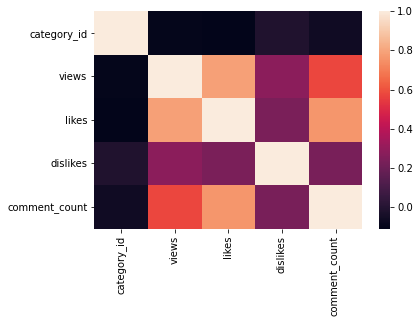

In [48]:
sns.heatmap(data.corr())